<a href="https://colab.research.google.com/github/Darwin575/CSE422_Courseworks/blob/main/Lariosa_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


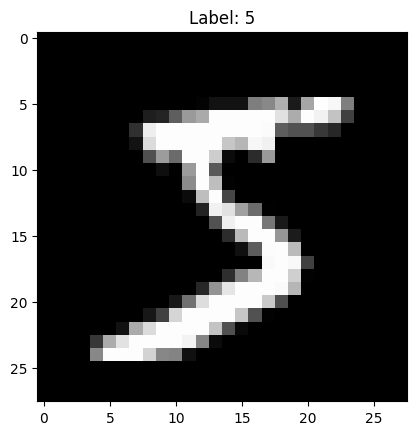

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Training the model with Leaky ReLU and Sigmoid activation functions...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8366 - loss: 0.1142 - val_accuracy: 0.9465 - val_loss: 0.0377
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9542 - loss: 0.0328 - val_accuracy: 0.9632 - val_loss: 0.0259
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9702 - loss: 0.0226 - val_accuracy: 0.9703 - val_loss: 0.0214
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9785 - loss: 0.0169 - val_accuracy: 0.9712 - val_loss: 0.0211
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9837 - loss: 0.0135 - val_accuracy: 0.9744 - val_loss: 0.0192
Evaluating the model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0205
Test Accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


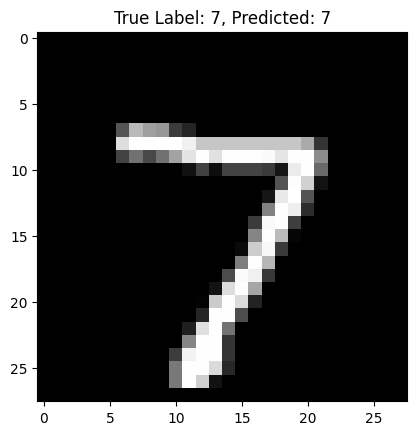

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Visualize a sample from the dataset
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    LeakyReLU(alpha=0.01),  # Leaky ReLU activation
    Dense(10, activation='sigmoid')  # Sigmoid activation for output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training the model with Leaky ReLU and Sigmoid activation functions...")
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_split=0.2)

# Evaluate the model on the test dataset
print("Evaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model.predict(x_test)

# Visualize a prediction
index = 0  # Change index to view different test samples
plt.imshow(x_test[index], cmap='gray')
predicted_label = np.argmax(predictions[index])
plt.title(f"True Label: {y_test[index]}, Predicted: {predicted_label}")
plt.show()
